#  Problem 6

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import glob
import matplotlib.pyplot as plt
import copy

In [2]:
import image_loader as imgl

## image loader

In [3]:
train_path = './FACES/Train/'
test_path = './FACES/Test/'

train_images, train_labels = imgl.readImages('FACES/', 'Train',28)
test_images, test_labels = imgl.readImages('FACES/', 'Test',14)

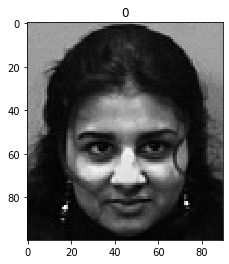

Text(0.5, 1.0, '0')

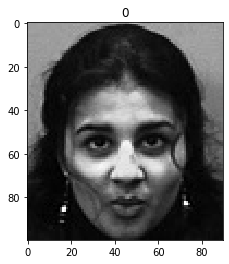

In [4]:
plt.imshow(train_images[0])
plt.title(str(train_labels[0]))
plt.show()
plt.imshow(train_images[1])
plt.title(str(train_labels[1]))

# Make Data in a line to form dimensions 

In [5]:
tra = copy.deepcopy(train_images)
tra = tra.reshape(train_images.shape[0] , -1)

tes = copy.deepcopy(test_images)
tes = tes.reshape(test_images.shape[0] , -1)

## lets test some of n_features to select with pca

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'difference')

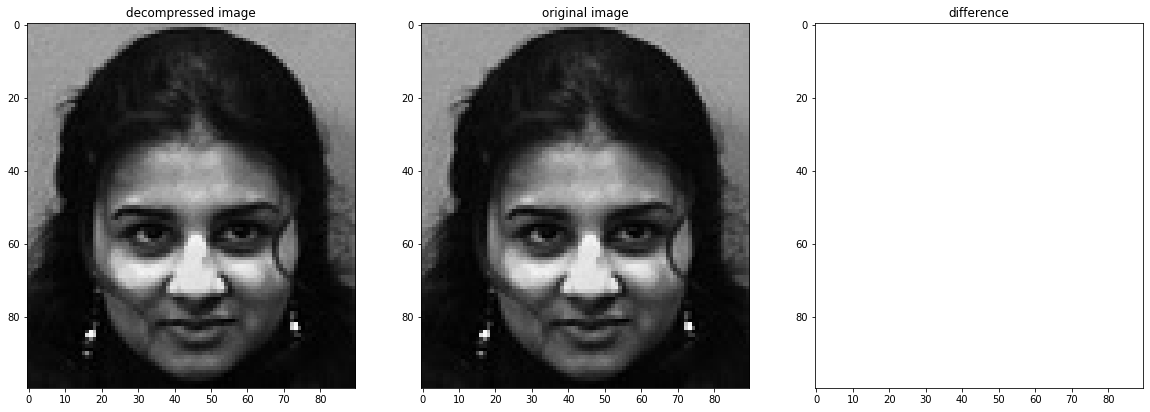

In [6]:
# compress and decompress image 0
pca = PCA()
pca.fit(tra)
compresed_img = pca.transform(tra[0].reshape(1 , -1))
decomprese_img = pca.inverse_transform(compresed_img)
decomprese_img = decomprese_img.reshape(train_images[0].shape)

#show image
fig , (ax1 , ax2 , ax3) = plt.subplots(1 , 3 , figsize = (20 , 100))

ax1.imshow(decomprese_img);
ax1.set_title("decompressed image")

ax2.imshow(train_images[0]);
ax2.set_title("original image")

ax3.imshow(train_images[0] - decomprese_img);
ax3.set_title("difference")


In [18]:
pca.n_features_ / compresed_img.shape[1]

1285.7142857142858

In [19]:
pca.n_features_

36000

# compression factor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

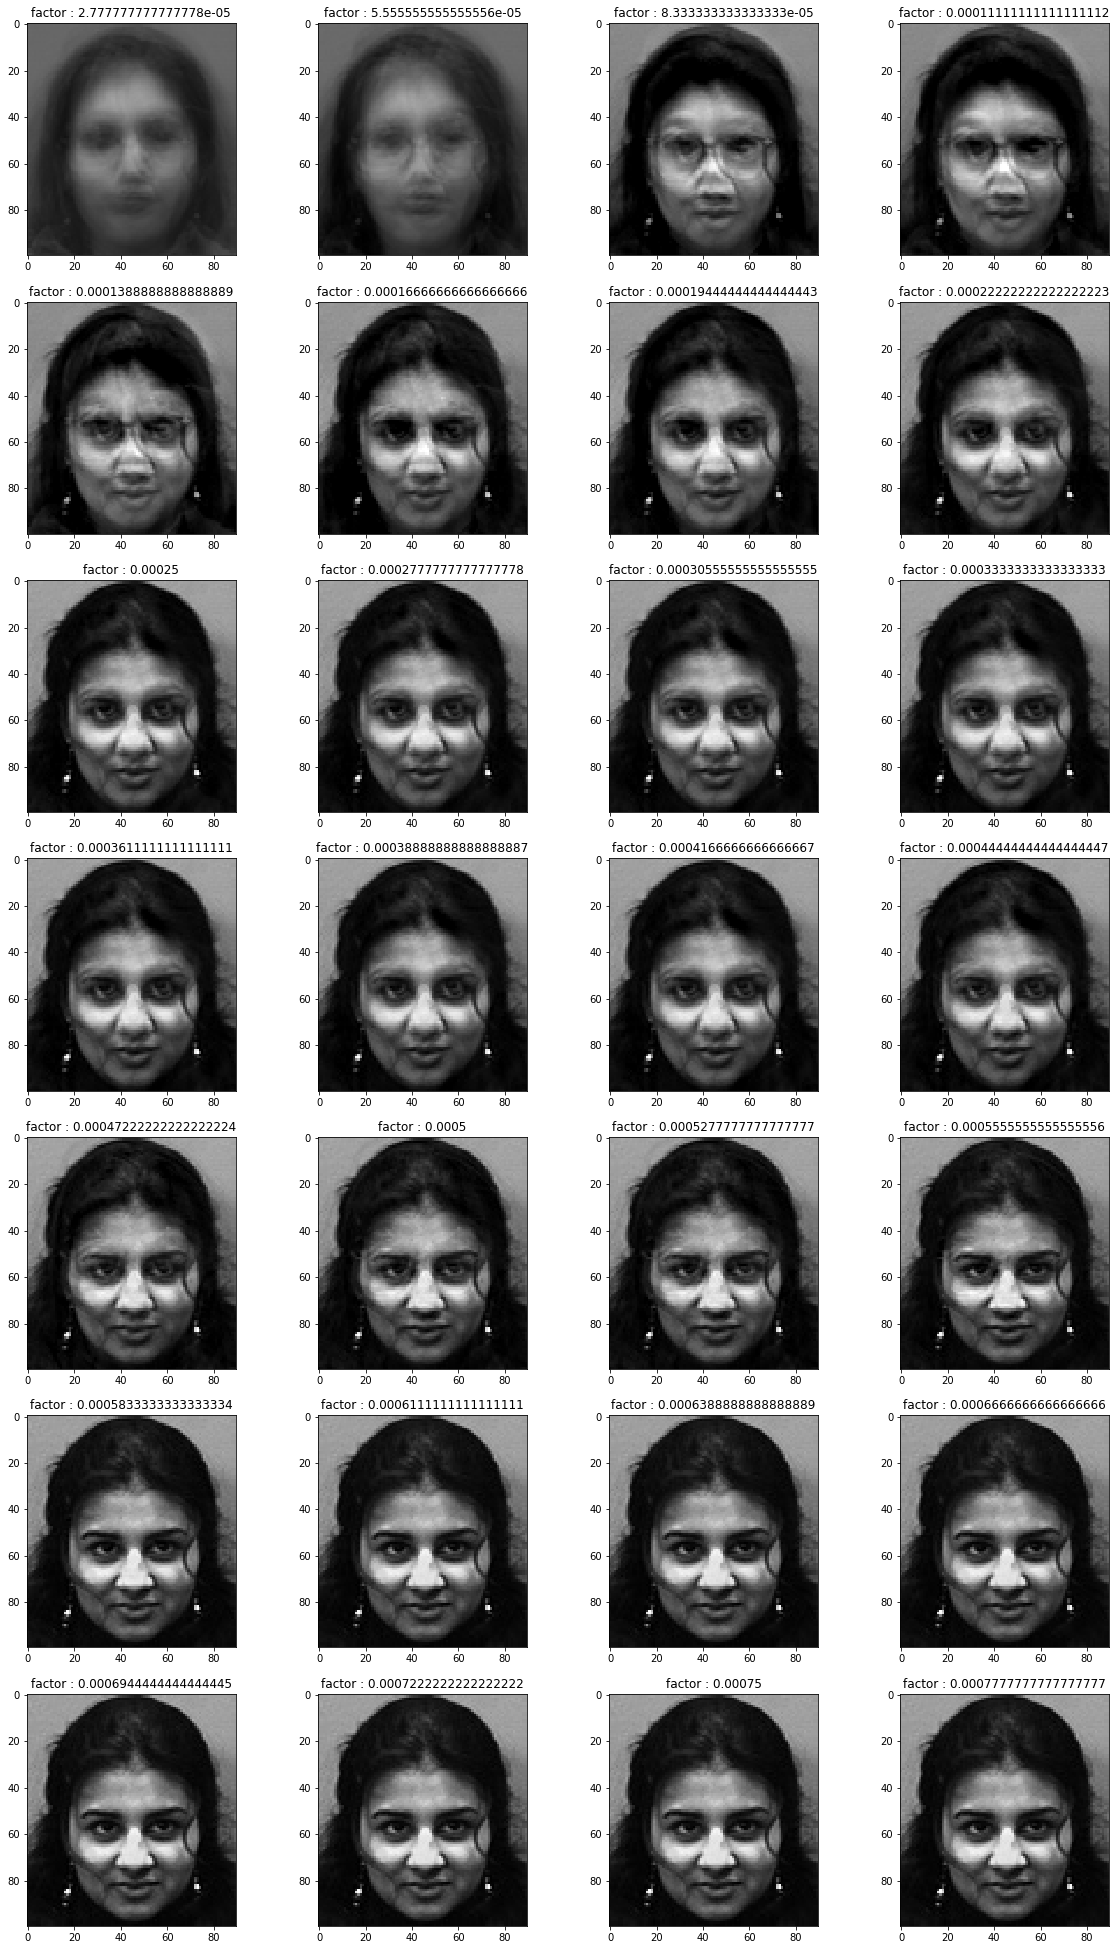

In [15]:
fig , axex = plt.subplots(7 , 4 , figsize = (4*5, 7*5))
for n in range(28):
    pca = PCA(n_components=n+1)
    pca.fit(tra)

    compresed_img = pca.transform(tra[0].reshape(1 , -1))
    decomprese_img = pca.inverse_transform(compresed_img)
    decomprese_img = decomprese_img.reshape(train_images[0].shape);
    
    axex[int(n/4), n%4].imshow(decomprese_img)
    factor = pca.n_components/pca.n_features_
    axex[int(n/4), n%4].set_title(f'factor : {factor}')
    

# mse of compression

Text(0, 0.5, 'mse')

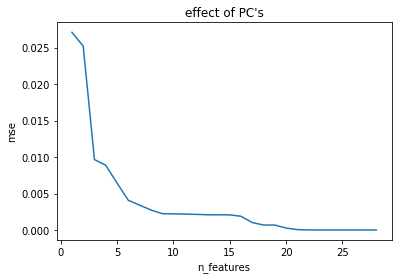

In [66]:
x = []
mse = []

for n in range(1 , 29):
    pca = PCA(n_components=n)
    pca.fit(tra)

    compresed_img = pca.transform(tra[0].reshape(1 , -1))
    decomprese_img = pca.inverse_transform(compresed_img)
    decomprese_img = decomprese_img.reshape(train_images[0].shape)
    
    msei =(np.square(decomprese_img - train_images[0])).mean()
    mse.append(msei)
    x.append(n)
    
plt.plot(x , mse)
plt.title("effect of PC's")
plt.xlabel("n_features")
plt.ylabel("mse")

# Lets check how compretion affects the accuracy of nn classifier 

In [68]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

Text(0, 0.5, 'acc')

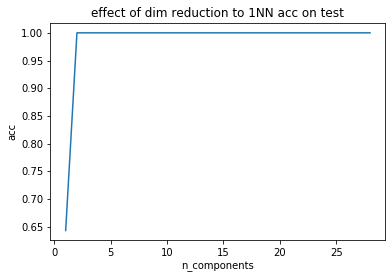

In [70]:
ACC = []
N   = []
for n in range(28 ,0 , -1):
    pca = PCA(n_components=n)
    pca.fit(tra)
    
    tra_red = pca.transform(tra)
    tes_red = pca.transform(tes)
    
    knn = KNN(n_neighbors=1)
    knn.fit(tra_red , train_labels)
    pred = knn.predict(tes_red)
    acc = metrics.accuracy_score(pred , test_labels)
    
    ACC.append(acc)
    N.append(n)

plt.plot(N , ACC)
plt.title("effect of dim reduction to 1NN acc on test")
plt.xlabel("n_components")
plt.ylabel("acc")